In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import time
import threading
%matplotlib inline

In [2]:
lenders_tags = pd.read_pickle('lenders_with_tags_and_genders')
tag = list(lenders_tags['TAG_INTS'])
for i in range(len(tag) - 1):
    if type(tag[i]) is tuple:
        x = []
        for j in tag[i]:
            x.append(j.strip(' '))
        tag[i] = tuple(x)
lenders_tags['TAG_INTS'] = tag
lenders_tags['OCCUPATION'] = lenders_tags['OCCUPATION'].str.lower()
lenders_tags['MEMBER_SINCE'] = pd.to_datetime(lenders_tags['MEMBER_SINCE'],unit='s')

KeyboardInterrupt: 

In [ ]:
occup_group = lenders_tags.groupby('OCCUPATION').size()

In [ ]:
occupation_by_number = occup_group.sort_values(ascending = False)[0:10]

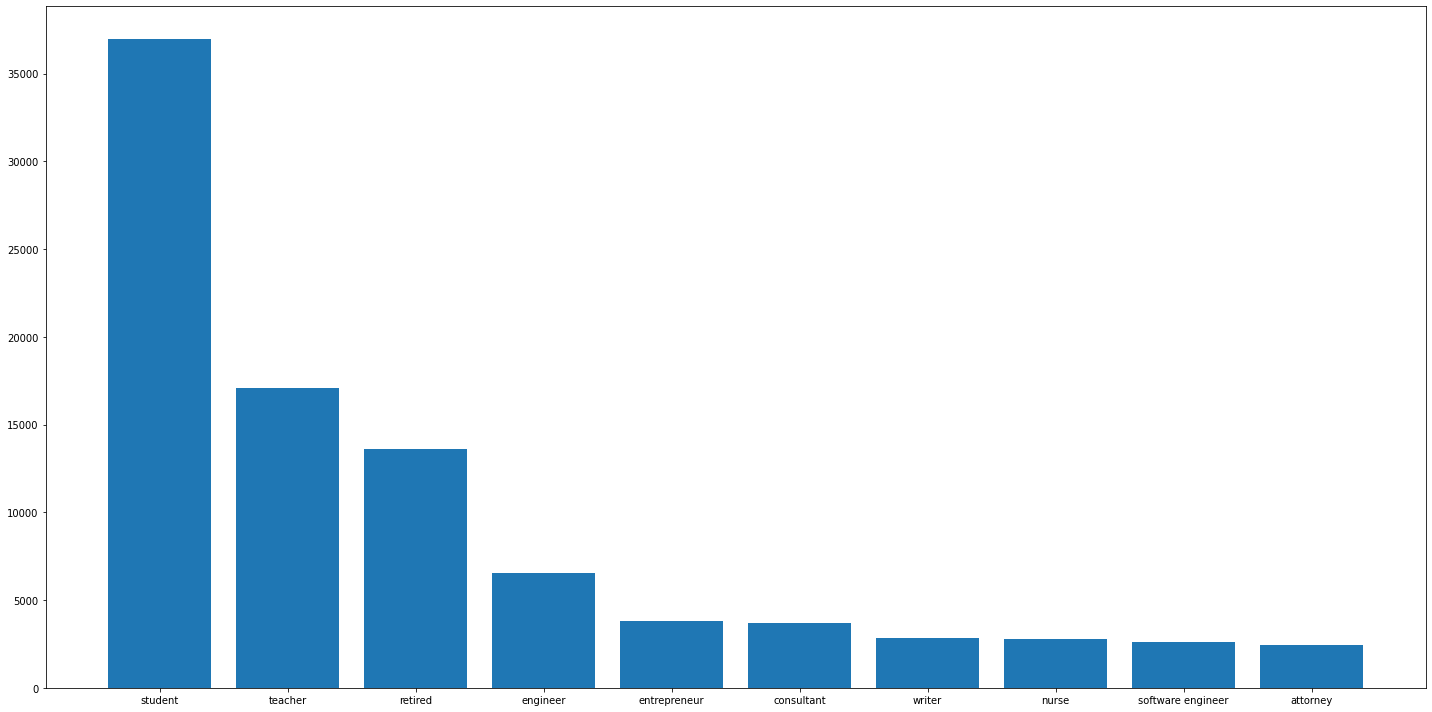

In [5]:
plt.figure(figsize = (20,10))
plt.bar(occupation_by_number.index, occupation_by_number)
plt.tight_layout()
plt.savefig('occupation_rank')

In [6]:
occup_group_by_loan_sum= lenders_tags.groupby('OCCUPATION').sum()['LOAN_PURCHASE_NUM']

In [7]:
mid_loan_sum = pd.concat([occup_group_by_loan_sum, occup_group], axis = 1)

In [8]:
mid_loan_sum.sort_values('LOAN_PURCHASE_NUM', ascending = False)

,LOAN_PURCHASE_NUM,0
OCCUPATION,,
retired,1013148,13636
teacher,635103,17114
student,567464,36984
engineer,441954,6542
entrepreneur,273168,3797
...,...,...
marketing & events professio/promo item specialist,1,1
marketing & logistics,1,1
marketing & public relations director,1,1


In [9]:
mid_loan_sum['loan_per_person'] = mid_loan_sum['LOAN_PURCHASE_NUM'] / mid_loan_sum[0]

In [10]:
rpt_loan_sum1 = (mid_loan_sum.sort_values(0, ascending = False)[0:20]).sort_values('loan_per_person',ascending = False)

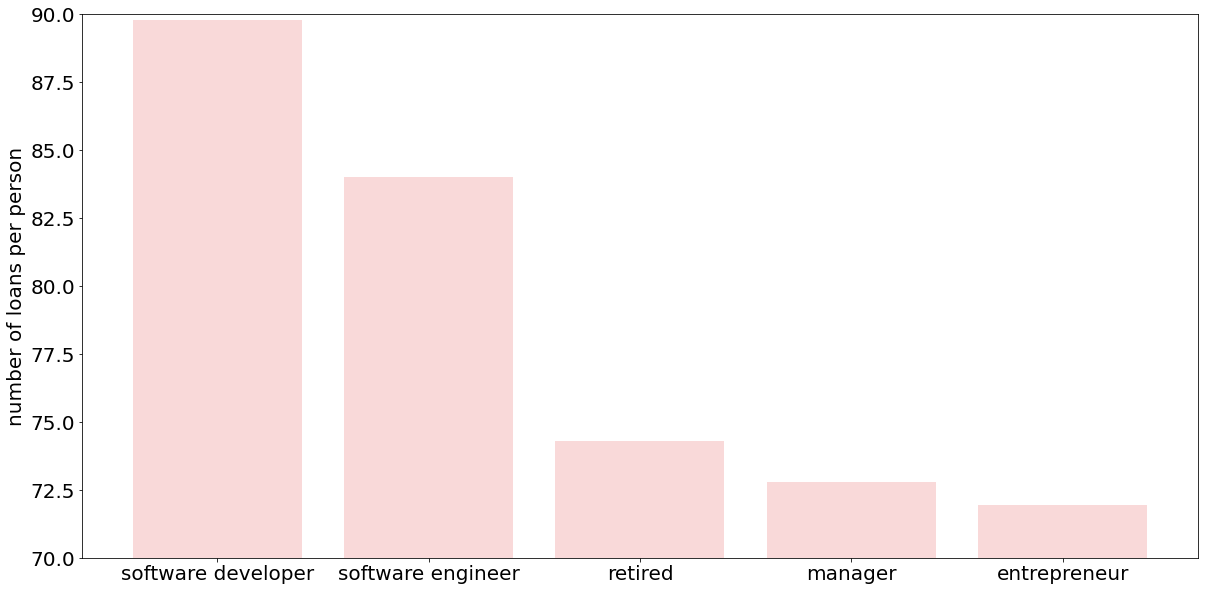

In [48]:
plt.figure(figsize = (20,10))
plt.bar(rpt_loan_sum1.index[0:5], rpt_loan_sum1['loan_per_person'][0:5], color = '#F9D9D9')
plt.ylabel('number of loans per person', size = 20)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.ylim([70,90])
plt.savefig('number of loans per person',dpi = 1200)

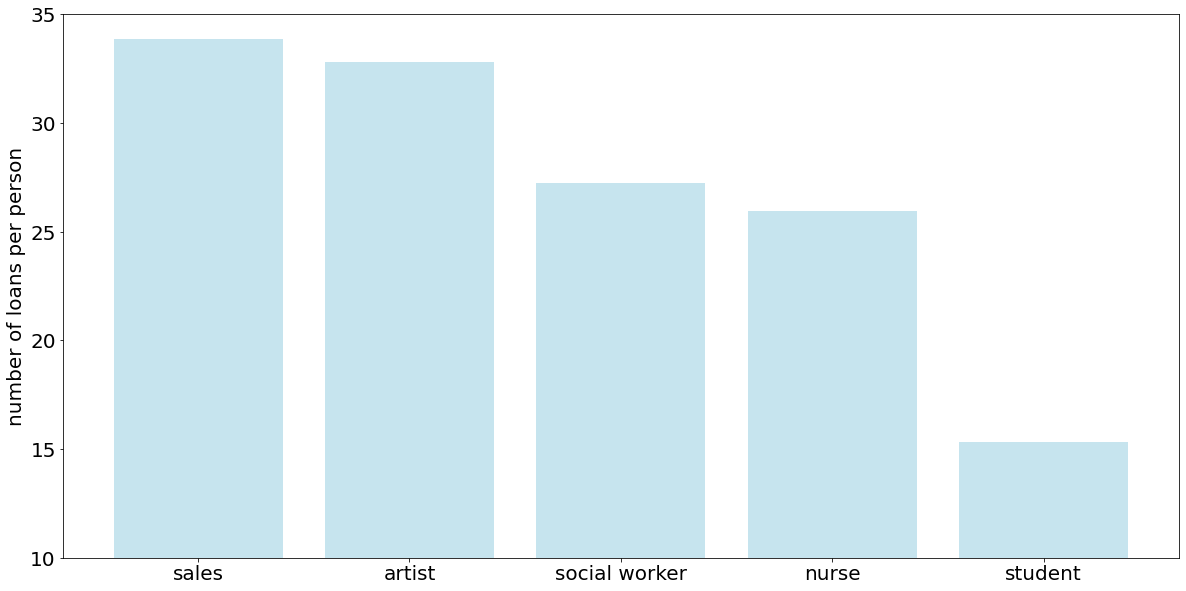

In [50]:
plt.figure(figsize = (20,10))
plt.bar(rpt_loan_sum1.index[15:20], rpt_loan_sum1['loan_per_person'][15:20], color = '#C6E4EE')
plt.ylabel('number of loans per person',size = 20)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.ylim([10,35])
plt.savefig('least number of loans per person', dpi = 1200)

In [13]:
def new_user_yearly(start_year,end_year):
    return ((lenders_tags[(lenders_tags['MEMBER_SINCE'] >= start_year) & (lenders_tags['MEMBER_SINCE']<= end_year)].sort_values('MEMBER_SINCE', ascending = False)).groupby('OCCUPATION').size()).sort_values(ascending = False)

In [14]:
year_list = [new_user_yearly(str(i), str(i+1)) for i in range(2010,2020)]

In [15]:
now = new_user_yearly('2015', '2021')
ago = new_user_yearly('2010', '2015')

In [16]:
ago_df = pd.DataFrame(ago.rank(ascending = False))
now_df = pd.DataFrame(now.rank(ascending = False)).merge(ago_df, how = 'right', left_index = True, right_index= True)

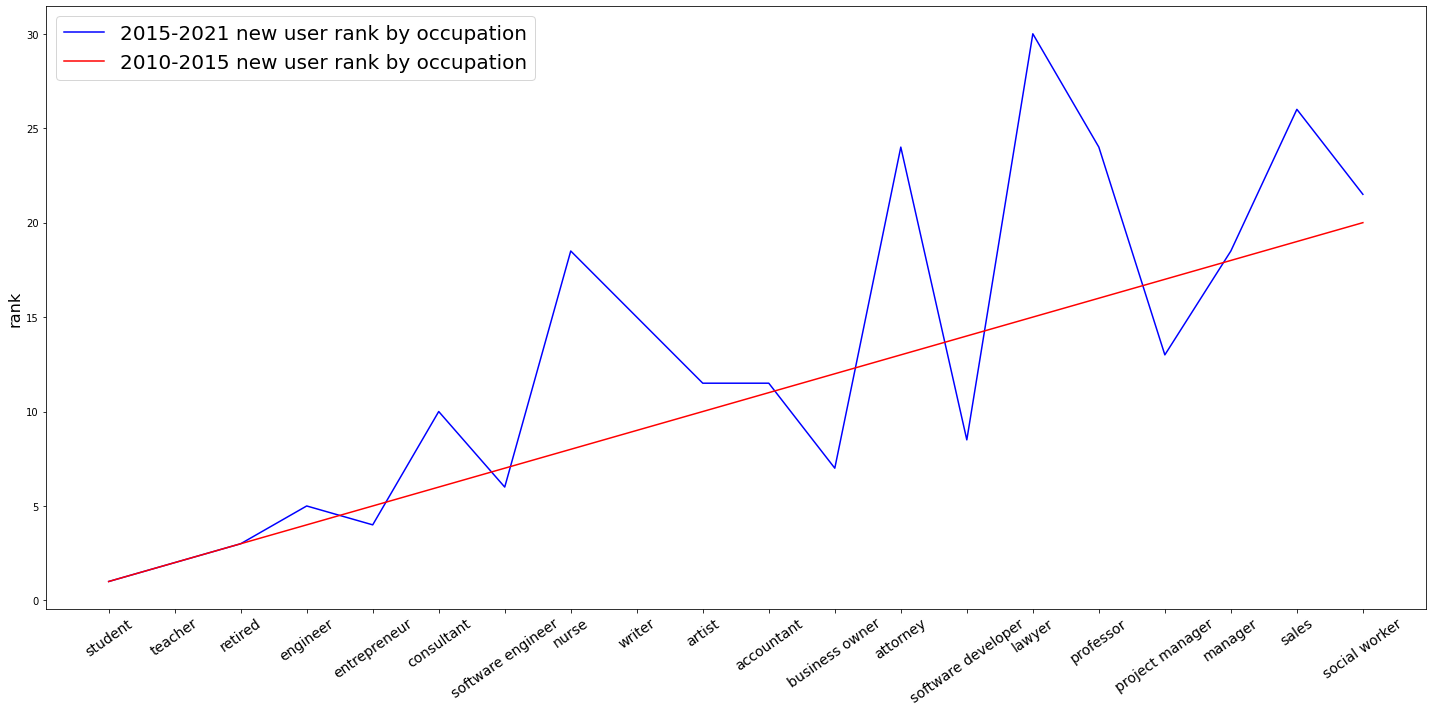

In [39]:
plt.figure(figsize = (20,10))
plt.plot(now_df['0_x'][0:20], color = 'b')
plt.plot(now_df['0_y'][0:20], color = 'r')
plt.xticks(fontsize=16,rotation = 35) 
plt.xticks(fontsize =14)
plt.ylabel('rank',fontsize =16)
plt.legend(['2015-2021 new user rank by occupation','2010-2015 new user rank by occupation'],fontsize = 20)
plt.tight_layout()
plt.savefig('audience influx.png',dpi = 1200)

In [40]:
now_df

,0_x,0_y
OCCUPATION,,
student,1.0,1.0
teacher,2.0,2.0
retired,3.0,3.0
engineer,5.0,4.0
entrepreneur,4.0,5.0
...,...,...
government executive,NaN,12192.5
government events coordinator,NaN,12192.5
government employee,NaN,12192.5
